# Phase 1: Data Cleaning and Preprocessing

This notebook focuses on loading, cleaning, and handling missing values in a housing dataset from Beijing. Key steps include dropping irrelevant columns, analyzing missing data, and imputing or removing missing values efficiently.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with appropriate encoding for Chinese characters
housing = pd.read_csv('housing_data.csv', encoding='gbk')
print(f"Initial dataset shape: {housing.shape}")

Initial dataset shape: (318851, 22)


C:\Users\MSI\AppData\Local\Temp\ipykernel_28984\1693346101.py:7: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


## Part 1: Dropping Unnecessary Columns

Remove columns that are not relevant for analysis: `Unnamed: 0` (index), `url`, `id`, and `Cid`.

In [2]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'url', 'id', 'Cid']
housing_dropped = housing.drop(columns=columns_to_drop)
print(f"Shape after dropping columns: {housing_dropped.shape}")
housing_dropped.head()

Shape after dropping columns: (318851, 18)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


## Part 2: Analyzing Missing Values

Create a DataFrame summarizing the number of missing values per column.

In [3]:
# Calculate missing values and create a summary DataFrame
housing_null = pd.DataFrame({
    'Column': housing_dropped.columns,
    'number of null values': housing_dropped.isnull().sum().values
})
housing_null.head()

,Column,number of null values
0,Lng,0
1,Lat,0
2,tradeTime,0
3,DOM,157977
4,totalPrice,0


## Visualization: Missing Values and Outliers

Visualize missing values and check the distribution of `DOM` (Days on Market) for outliers.

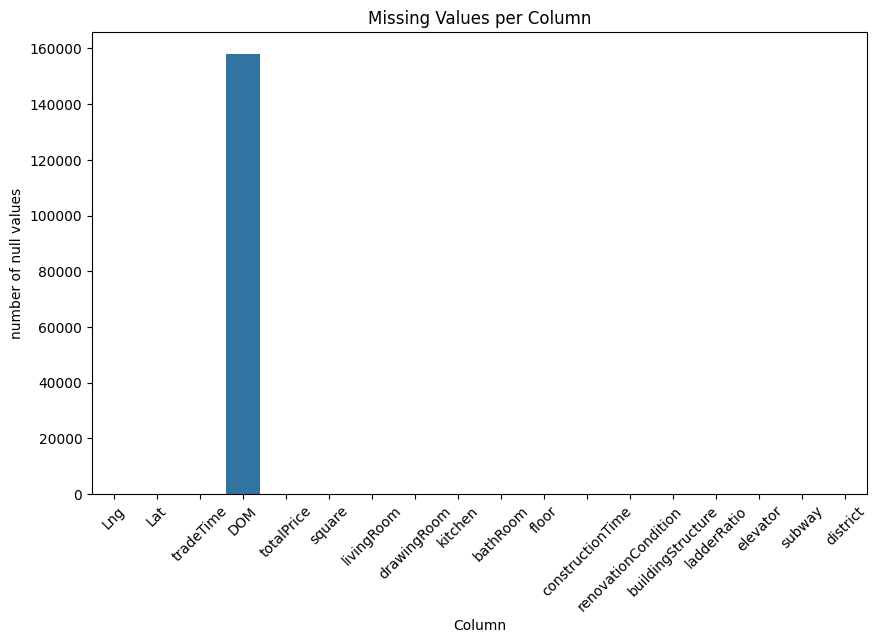

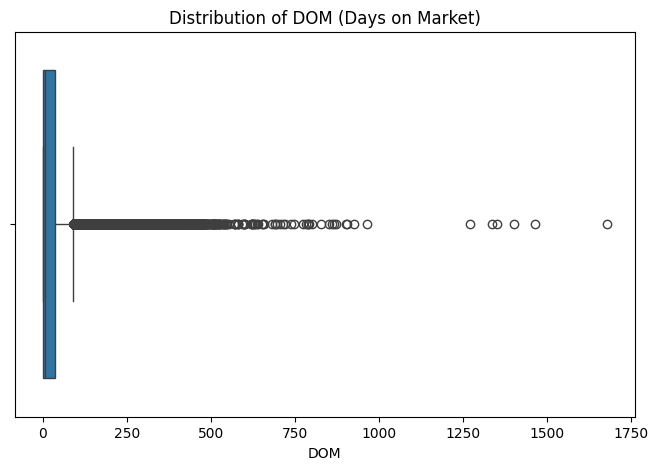

In [4]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='number of null values', data=housing_null)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.show()

# Boxplot for DOM to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=housing_dropped['DOM'])
plt.title('Distribution of DOM (Days on Market)')
plt.show()

## Part 3: Handling Missing Values

- Impute missing `DOM` values with the mode due to significant outliers.
- Drop rows with missing `elevator` or `subway` values (minimal impact).
- Add outlier removal for `DOM` using IQR method for robustness.

In [5]:
# Create a copy for preprocessing
housing_no_missing = housing_dropped.copy()

# Impute DOM with mode
dom_mode = housing_no_missing['DOM'].mode()[0]
housing_no_missing['DOM'] = housing_no_missing['DOM'].fillna(dom_mode)

# Drop rows with missing elevator or subway
housing_no_missing = housing_no_missing.dropna(subset=['elevator', 'subway'])

# Outlier removal for DOM using IQR
Q1 = housing_no_missing['DOM'].quantile(0.25)
Q3 = housing_no_missing['DOM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
housing_no_missing = housing_no_missing[(housing_no_missing['DOM'] >= lower_bound) & 
                                        (housing_no_missing['DOM'] <= upper_bound)]

print(f"Shape after cleaning: {housing_no_missing.shape}")
housing_no_missing.head()

Shape after cleaning: (256845, 18)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
10121,116.414015,39.959857,2016-06-16,16.0,490.0,102.99,1,1,1,1,高 12,1994,3,6,0.400,1.0,1.0,1
10184,116.245538,40.220033,2016-06-16,16.0,153.0,59.39,2,1,1,1,低 6,1993,1,2,0.167,0.0,0.0,6
10364,116.471348,39.900620,2016-06-15,15.0,710.0,106.64,2,1,1,1,中 21,2006,4,6,0.400,1.0,0.0,7
10389,116.690070,39.870642,2016-06-16,15.0,358.0,100.29,2,2,1,1,低 16,2009,4,6,0.500,1.0,0.0,11
10439,116.543995,39.747293,2016-06-18,16.0,310.0,130.45,3,1,1,2,中 11,2014,2,6,0.333,1.0,0.0,11


## Final Verification

Ensure no missing values remain and display dataset info.

In [6]:
# Verify no missing values
print(housing_no_missing.isnull().sum())
housing_no_missing.info()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
subway                 0
district               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 256845 entries, 10121 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  256845 non-null  float64
 1   Lat                  256845 non-null  float64
 2   tradeTime            256845 non-null  object 
 3   DOM                  256845 non-null  float64
 4   totalPrice           256845 non-null  float64
 5   square               256845 non-null  float64
 6   livingRoom    

## Save Cleaned Data

Export the cleaned dataset with proper encoding.

In [ ]:
# Save the cleaned dataset
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)

## Submission Preparation

Prepare arrays for submission as per requirements.

In [ ]:
import numpy as np
import zipfile

# Save required arrays
np.save('housing_dropped_cols.npy', np.array(housing_dropped.columns.to_list()))
np.save('housing_null.npy', housing_null.to_numpy())
np.save('housing_no_missing_DOM.npy', housing_no_missing['DOM'].to_numpy())

# Compress files into result.zip
file_names = ['housing_dropped_cols.npy', 'housing_null.npy', 'housing_no_missing_DOM.npy', '1_fill_missing_values.ipynb']
with zipfile.ZipFile('result.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zf:
    for file in file_names:
        zf.write(file)
print('Submission files compressed into result.zip')